Sumber dataset: https://www.kaggle.com/c/titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


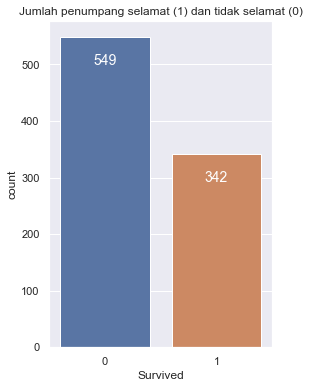

In [2]:
plt.figure(figsize=(4,6))
plt.title('Jumlah penumpang selamat (1) dan tidak selamat (0)')
ax = sns.countplot(x='Survived', data=df)

for patch in ax.patches:
    ax.annotate(patch.get_height(), (patch.get_x()+0.4,patch.get_height()-30), 
                ha='center', va='top', color='white', size=14)

plt.show()

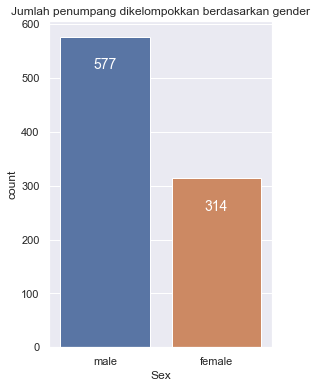

In [3]:
plt.figure(figsize=(4,6))
plt.title('Jumlah penumpang dikelompokkan berdasarkan gender')
ax = sns.countplot(x='Sex', data=df)

for patch in ax.patches:
    ax.annotate(patch.get_height(), (patch.get_x()+0.4,patch.get_height()-40),
                ha='center', va='top', color='white', size=14)
    
plt.show()

In [4]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

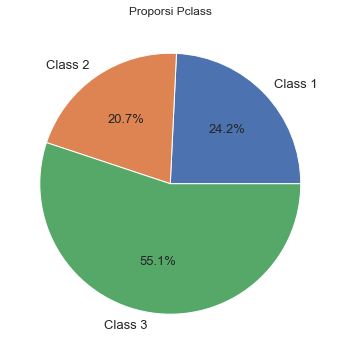

In [5]:
plt.figure(figsize=(6,6))
plt.title('Proporsi Pclass')

plt.pie(pclass_count, labels=['Class 1', 'Class 2', 'Class 3'], 
        autopct='%1.1f%%', textprops={'fontsize':13})

plt.show()

In [6]:
embarked_count = df.groupby('Embarked')['Embarked'].count()
embarked_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

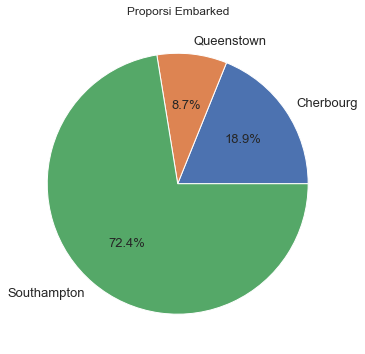

In [7]:
plt.figure(figsize=(6,6))
plt.title('Proporsi Embarked')

plt.pie(embarked_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
        autopct='%1.1f%%', textprops={'fontsize':13})

plt.show()

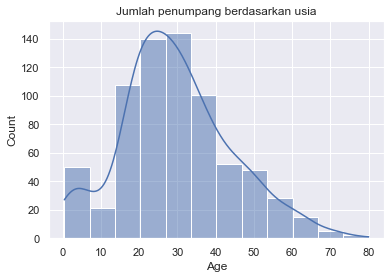

In [8]:
plt.title('Jumlah penumpang berdasarkan usia')
sns.histplot(df['Age'], bins=12, kde=True)
plt.show()

In [9]:
ages_hist = np.histogram(df['Age'], bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1], dtype=int64),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [10]:
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

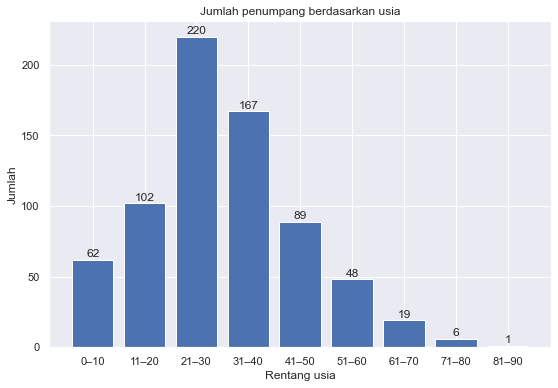

In [11]:
plt.figure(figsize=(9,6))
plt.title('Jumlah penumpang berdasarkan usia')

plt.bar(ages_hist_labels, ages_hist[0])

plt.xlabel('Rentang usia')
plt.ylabel('Jumlah')

for x, height in zip(range(9), ages_hist[0]):
    plt.text(x, height+2, str(int(height)), fontsize=12,
             horizontalalignment='center')

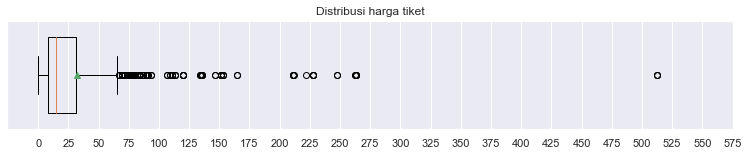

In [12]:
plt.figure(figsize=(13,2))
plt.title('Distribusi harga tiket')

plt.boxplot(df['Fare'], vert=False, widths=0.7, showmeans=True)

plt.yticks([])
plt.xticks(range(0,600,25))

plt.show()

In [13]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64